<a href="https://colab.research.google.com/github/ashiqur0421/CMSC320_Group_Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

df = pd.read_csv("Titanic-Dataset.csv")

def str_to_int(val):
    if val == 'male':
        return 0
    elif val == 'female':
        return 1
    else:
        return None

df['Sex'] = df['Sex'].apply(str_to_int)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(df['Age'].median())

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2_class, p_class, dof_class, _ = stats.chi2_contingency(contingency_table)
print(contingency_table)
print(f"Chi-square: {chi2_class:.3f}  p-value: {p_class:.6f}")


# Man vs Woman Chi-squared test (Who survives?)
# Survival rate vs pass. class
# Age outliers

df

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-square: 102.889  p-value: 0.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


From the contigency table, we see that there is a statistically significant relationship between passenger class and survival outcome. Passenger class is correlated with whether a passenger survived the Titanic. First class passengers were much more likely to survive, and this makes logical sense because they had better access to lifeboats and were given priority. The p-value is less than 0.01, meaning we reject the null hypothesis and conclude that passenger class is strongly associated with survival on the Titanic.

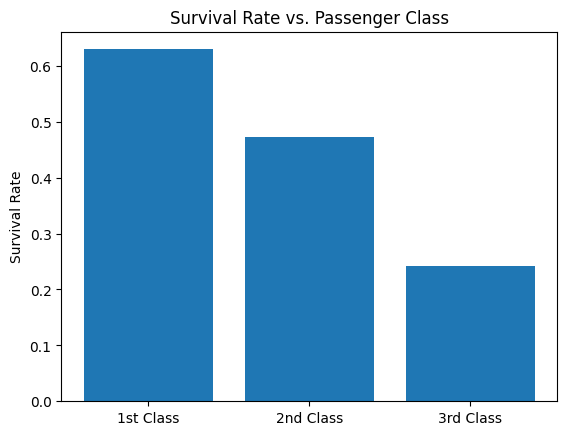

In [ ]:
survive_rate_class = contingency_table[1] / contingency_table.sum(axis=1)
x_values = ["1st Class", "2nd Class", "3rd Class"]
survival = survive_rate_class.values
plt.bar(x_values, survival)
plt.title("Survival Rate vs. Passenger Class")
plt.ylabel("Survival Rate")
plt.show()